Q.1) Import essential libraries for data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Q.2) Load the Airbnb dataset from a CSV file into a pandas DataFrame

In [2]:
df = pd.read_csv('Airbnb.csv')

Q.3) Print the first 20 rows of the dataset to get an initial understanding of its structure and content.

In [3]:
df.head(20)

,id,name,host_id,host_name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number_of_reviews,last review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160,6/9/2019,1.33,4,188


Q.4) Find out the shape of dataset and what does it indicate?

In [4]:
#Indicate the number row and columns.
df.shape

(48900, 16)

Q.5) List all column names and replace spaces in column labels with underscores “ _ “ for consistency and ease of
use.

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood group',
       'neighbourhood', 'latitude', 'longitude', 'room type', 'price',
       'minimum nights', 'number_of_reviews', 'last review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Q.6) Check the data types of each attribute to understand what type of data each column holds

In [58]:
df.dtypes

host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Q.7) Convert the service_fee and price columns from string to numeric types after removing any non-numeric
characters (e.g., currency symbols). Convert last_review to a datetime type.

In [8]:
df[['price','last_review']] #There is no service_fee column.

,price,last_review
0,149.0,10/19/2018
1,225.0,5/21/2019
2,150.0,NaN
3,89.0,7/5/2019
4,80.0,11/19/2018
...,...,...
48895,70.0,NaN
48896,40.0,NaN
48897,115.0,NaN
48898,55.0,NaN


In [9]:
df[['price','last_review']].dtypes

price          float64
last_review     object
dtype: object

The price column is already in float data type.

In [10]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [11]:
df[['price','last_review']].dtypes

price                 float64
last_review    datetime64[ns]
dtype: object

Q.8) Share the information of dataset. What is the importance of it in EDA?

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48900 entries, 0 to 48899
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48900 non-null  int64  
 1   host_name                       48879 non-null  object 
 2   neighbourhood_group             48900 non-null  object 
 3   neighbourhood                   48900 non-null  object 
 4   latitude                        48900 non-null  float64
 5   longitude                       48900 non-null  float64
 6   room_type                       48900 non-null  object 
 7   price                           48900 non-null  float64
 8   minimum_nights                  48900 non-null  float64
 9   number_of_reviews               48900 non-null  int64  
 10  last_review                     38848 non-null  object 
 11  reviews_per_month               38848 non-null  float64
 12  calculated_host_listings_count  

### Importance 
It summarizes a DataFrame's structure, including its size, column names, data types, and the presence of missing values. This information is vital for understanding data quality, identifying memory usage, and planning subsequent data manipulation and analysis tasks efficiently.

Q.9) Provide summary statistics for numerical columns. Highlight any unusual calculation you find (If any)

In [12]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48900.00,48900.00,48900.00,48900.00,48900.00,48900.00,48900.00,38848,38848.00,48900.00,48900.00
mean,19015199.28,67613097.51,40.73,-73.95,152.72,7.03,23.28,2018-10-04 02:02:57.182866432,1.37,7.14,112.78
min,2539.00,2438.00,40.50,-74.24,0.00,1.00,0.00,2011-03-28 00:00:00,0.01,1.00,0.00
25%,9470352.75,7812757.75,40.69,-73.98,69.00,1.00,1.00,2018-07-08 00:00:00,0.19,1.00,0.00
50%,19676200.50,30790584.00,40.72,-73.96,106.00,3.00,5.00,2019-05-19 00:00:00,0.72,1.00,45.00
75%,29151732.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,2019-06-23 00:00:00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,2019-07-08 00:00:00,58.50,327.00,365.00
std,10984229.18,78609920.61,0.05,0.05,240.14,20.51,44.56,NaN,1.68,32.95,131.63


The summary statistics of the dataset has some unusual findings. The maximum price is 10,000, significantly higher than the mean (|152.72) and the 75th percentile (175.00), indicating the presence of a few very high-priced listings. The maximum value for reviews per month is 58.50, far exceeding the mean (1.37), pointing to a highly popular listing. Additionally, the maximum number of listings managed by a single host is 327, indicating some hosts have large portfolios.

Q.10) Provide summary statistics for categorical columnsHighlight any unusual calculation you find (If any)

In [61]:
df.describe(include='O')

,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48900,48900,48900,38848
unique,11452,5,221,3,1764
top,Michael,Manhattan,Williamsburg,Entire home/apt,6/23/2019
freq,417,21664,3920,25413,1413


There is nothing intresting or important.

Q.11) Identify duplicate rows in the dataset and remove them to ensure data integrity.

In [14]:
no_duplicated_rows = df.duplicated().sum()
print(f"There are {no_duplicated_rows} duplicated rows in this dataset.")

There are 5 duplicated rows in this dataset.


In [15]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225.00,1.00,45,2019-05-21,0.38,2,355
12,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.69,-73.96,Private room,60.00,45.00,49,2017-10-05,0.40,1,0
13,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80,-73.97,Entire home/apt,135.00,5.00,53,2019-06-22,0.43,1,6
19,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.74,-74.01,Entire home/apt,120.00,90.00,27,2018-10-31,0.22,1,0
21,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69,-73.97,Entire home/apt,215.00,2.00,198,2019-06-28,1.72,1,321


In [28]:
df.drop_duplicates(keep='first',inplace=True)
print(f"There are now {df.duplicated().sum()} duplicated rows in this dataset.")

There are now 0 duplicated rows in this dataset.


Q.12) Check each column for null or empty values to understand the extent of missing data.

In [43]:
#checking each column for null or empty values.
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [44]:
# Count the total number of missing values for each column and sort them in descending order
total = df.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column and sort them in descending order
percent = round(((df.isnull().mean() * 100).sort_values(ascending=False)), 2)

# Combine the total and percentage of missing values into a single dataframe
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])

# Filter the dataframe to show only columns with missing values
missing_data = missing_data.loc[missing_data['total'] > 0]

# Display the dataframe showing columns with missing values
print(missing_data)


                   total  percent
last_review        10052    20.56
reviews_per_month  10052    20.56
host_name             21     0.04


<Axes: >

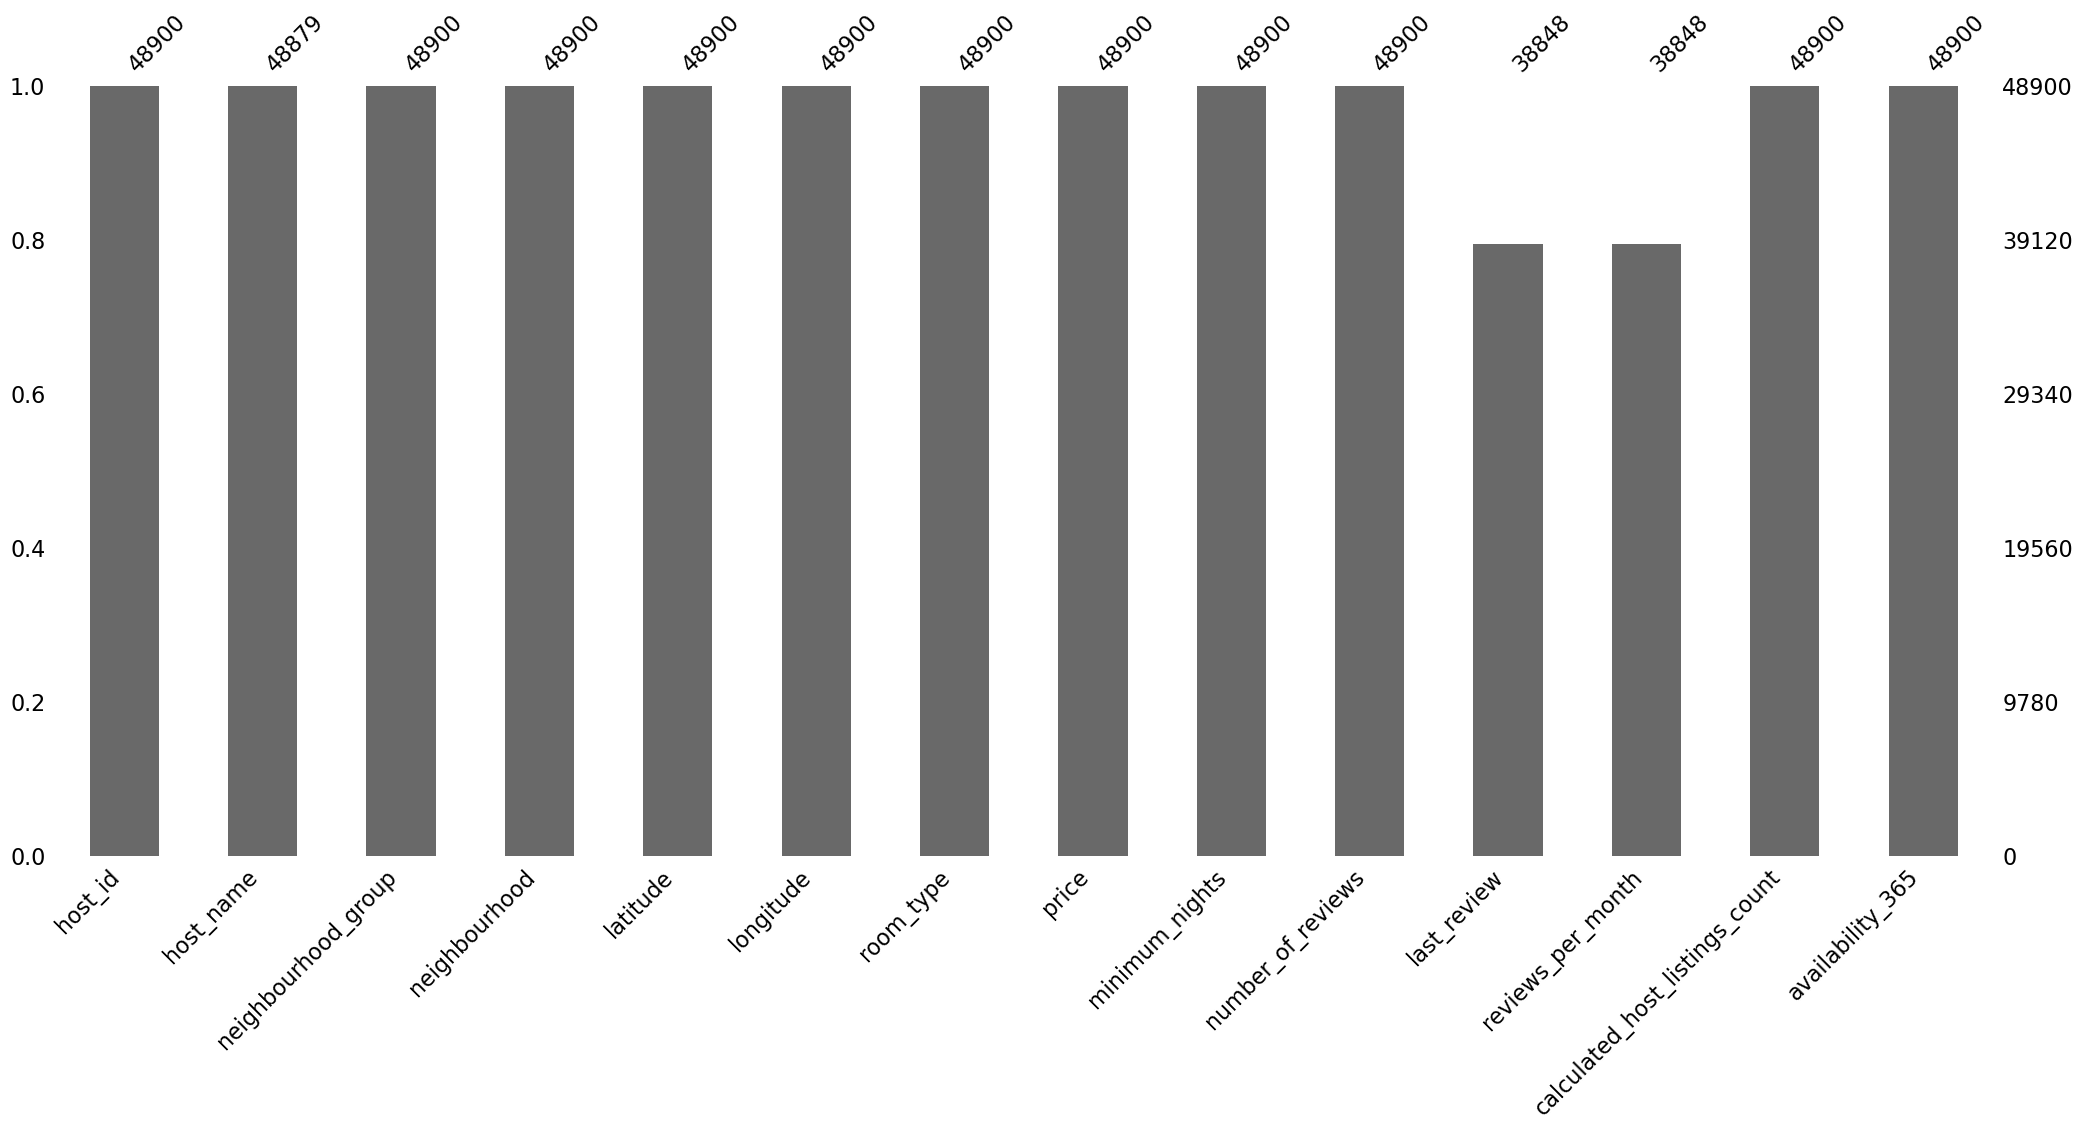

In [45]:
#Visualising the null values in each column.
msno.bar(df)

<Axes: >

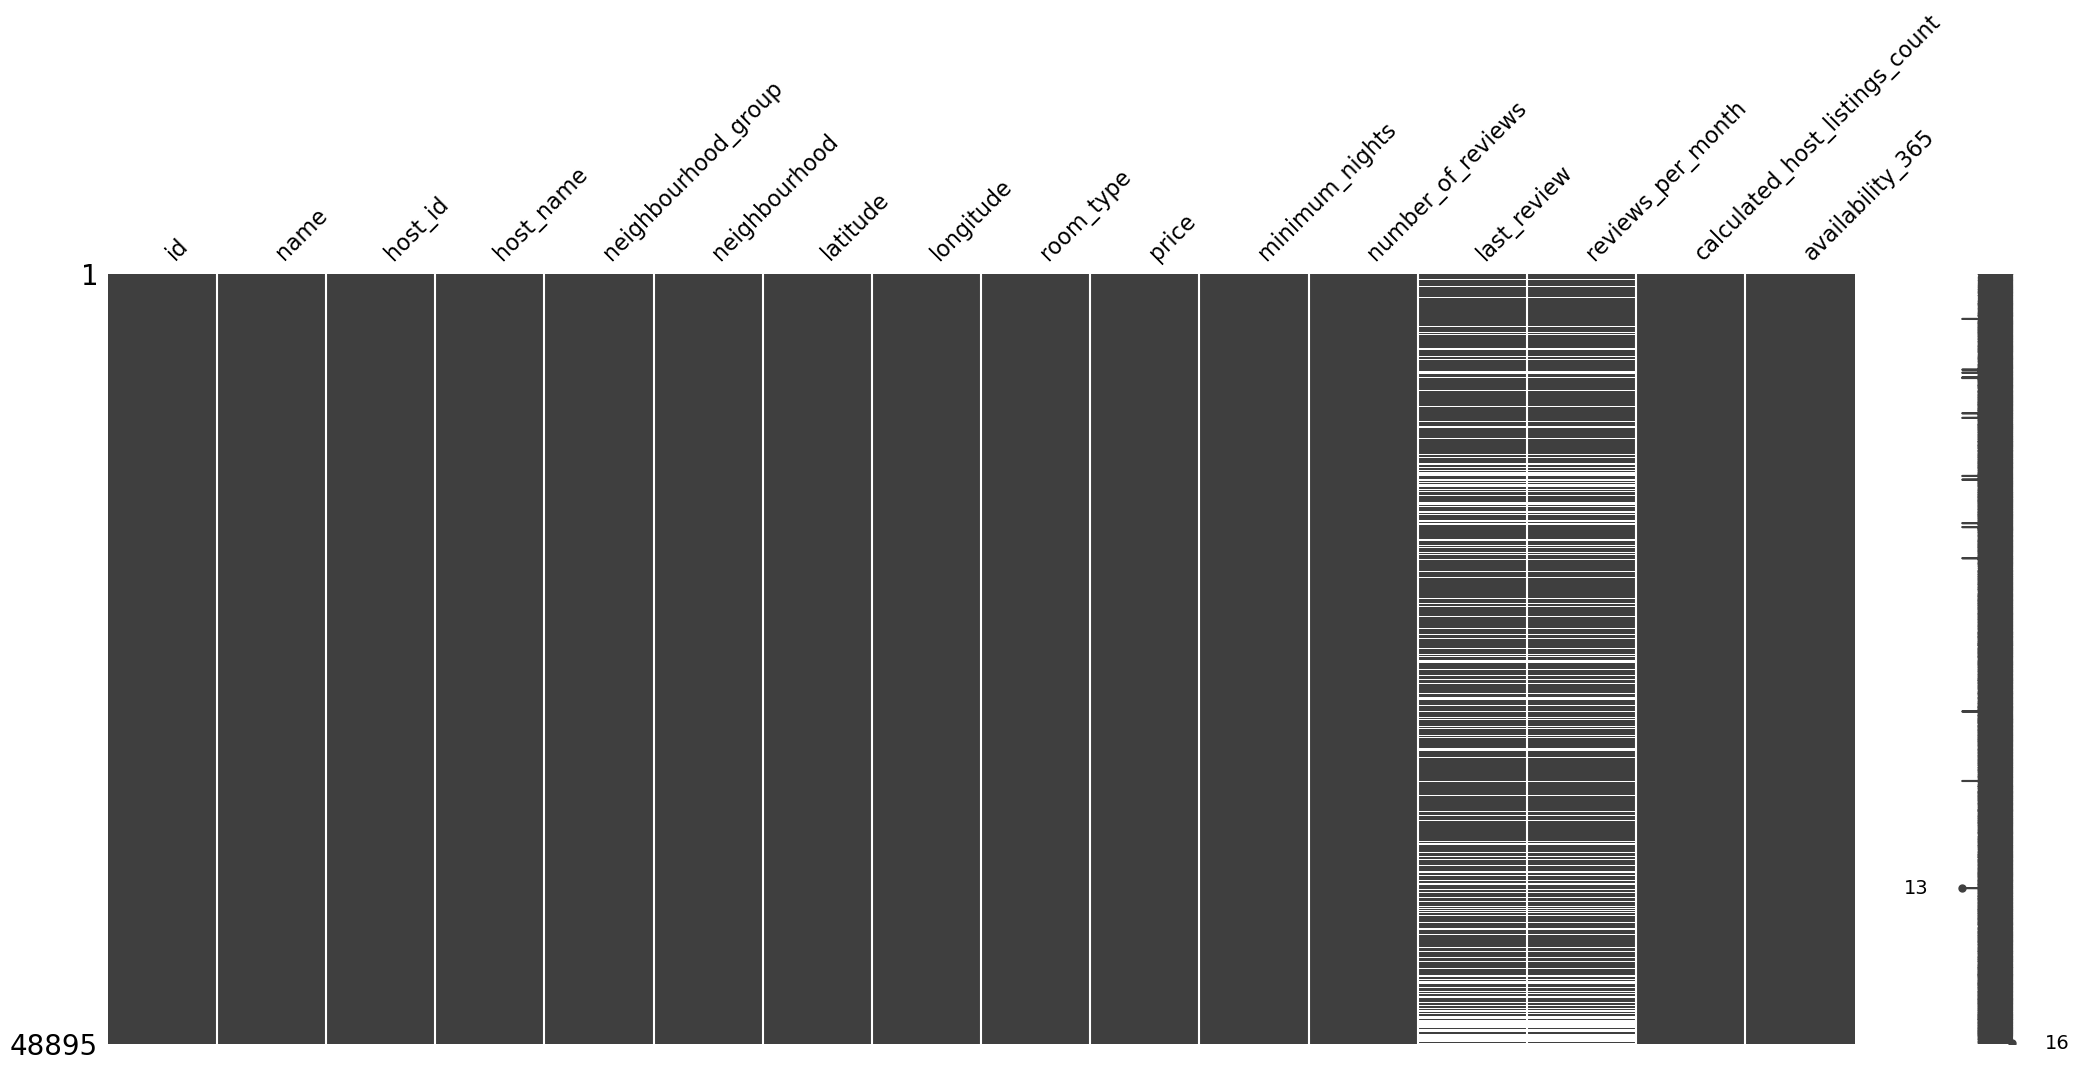

In [20]:
#Checking the location of null values in each column.
msno.matrix(df)

There are missing data in 4 columns in which two columns is having 20% missing data in each. Lets investigate it further and apply different techniques.

<Axes: >

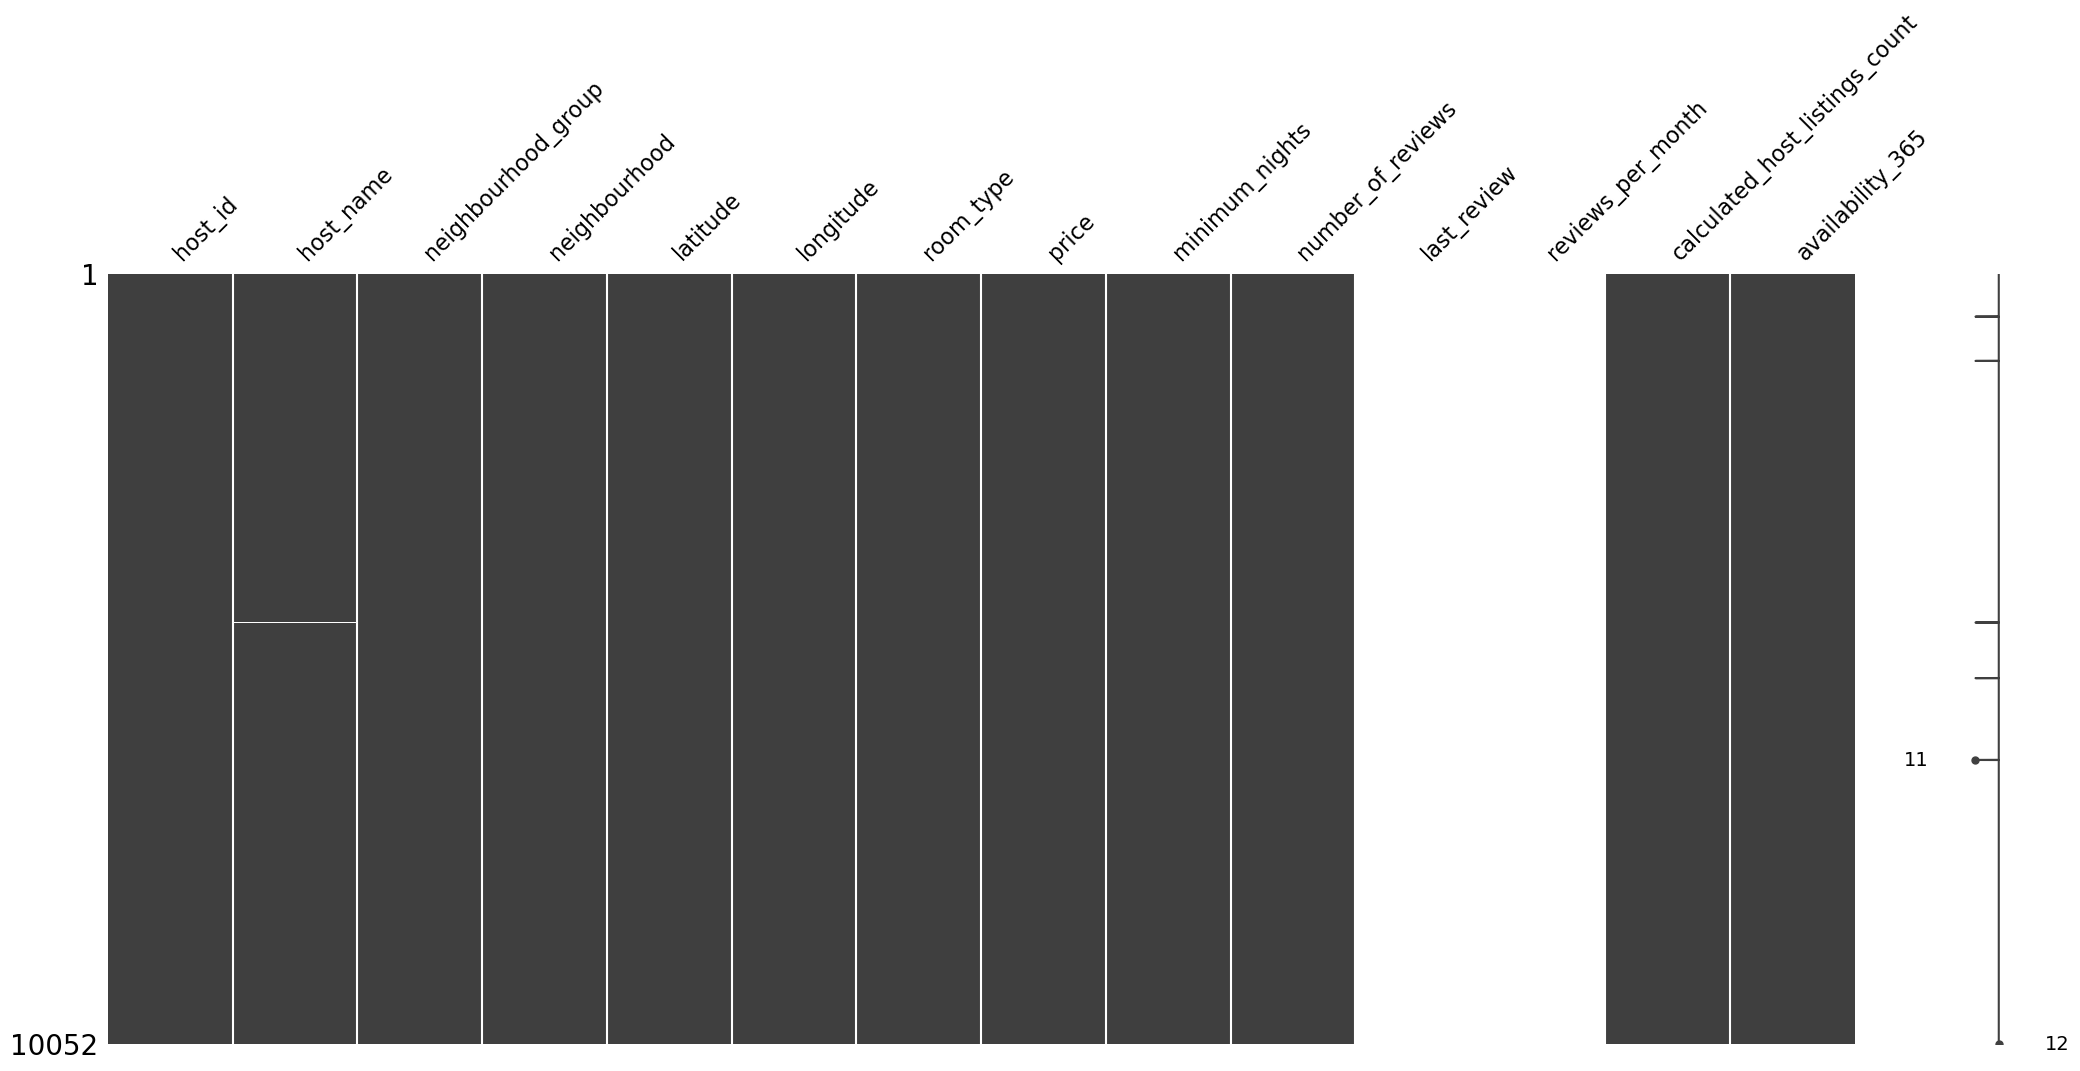

In [46]:
#Checking for null values where the number of reviews is zero.
df2 = df.loc[df['number_of_reviews'] == 0]
msno.matrix(df2)

The above visualization shows that when the number of reviews is zero, the columns 'last_review' and 'reviews_per_month' are missing all their values. This suggests that no reviews were given. Therefore, the 'reviews_per_month' column values should be zero, and there should be no date in the 'last_review' column. Here is how I will handle the missing data:

* I will drop the 'last_review' column since it has 20% missing values, and it cannot be imputed with random dates. Also, dropping the entire rows would result in losing 20% of the data.
* I will fill the 'reviews_per_month' column with 0.
* The 'name' and 'host_name' columns will be filled with a constant value 'unknown'.

In [23]:
# Drop the 'last_review' column.
df.drop(columns=['last_review'], inplace=True)

# Replace NaN values in 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Replace NaN values in 'host_name' and 'name' with 'unknown'
df[['host_name', 'name']] = df[['host_name', 'name']].fillna('unknown')

Q.14) Drop columns (last reviews, names and id)

In [8]:
#Already droped the lastg_review column.
df.drop(labels = ['id','name'], axis=1,inplace=True)

In [30]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149.00,1.00,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225.00,1.00,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150.00,3.00,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89.00,1.00,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80.00,10.00,9,0.10,1,0


Q.15) Find number of unique values for the columns ‘room type’, &#39;neighbourhood_group&#39; and &#39;neighbourhood&#39;.
Highlight the unusual answer if any and tackle with it.

In [31]:
aa = df[['room_type','neighbourhood_group','neighbourhood']]

for column in aa.columns:
    print(f"Column: {column}\nNo of Uniques: {aa[column].nunique()}")
    print(f"Unique Values: {[aa[column].unique() if aa[column].nunique() < 10 else 'Too many values to print']}")
    print("------------------------------------------------------------------")

Column: room_type
No of Uniques: 3
Unique Values: [array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)]
------------------------------------------------------------------
Column: neighbourhood_group
No of Uniques: 6
Unique Values: [array(['Brooklyn', 'Manhattan', 'Broklyn', 'Queens', 'Staten Island',
       'Bronx'], dtype=object)]
------------------------------------------------------------------
Column: neighbourhood
No of Uniques: 221
Unique Values: ['Too many values to print']
------------------------------------------------------------------


If you notice in the neighbourhood column, "Brooklyn" appears with two spellings: "Broklyn" and "Brooklyn." The correct spelling is "Brooklyn," so let's change it.

In [47]:
df.loc[df['neighbourhood_group'] == 'Broklyn', 'neighbourhood_group'] = 'Brooklyn'
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

All good now!

Q.16) What are the top 10 host IDs with the highest number of bookings?

In [48]:
df['host_id'].value_counts()[:10]

host_id
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
1475015       52
Name: count, dtype: int64

Q.17) Identify and list the top 10 host names based on the number of bookings and create a bar chart to visualize
this data.

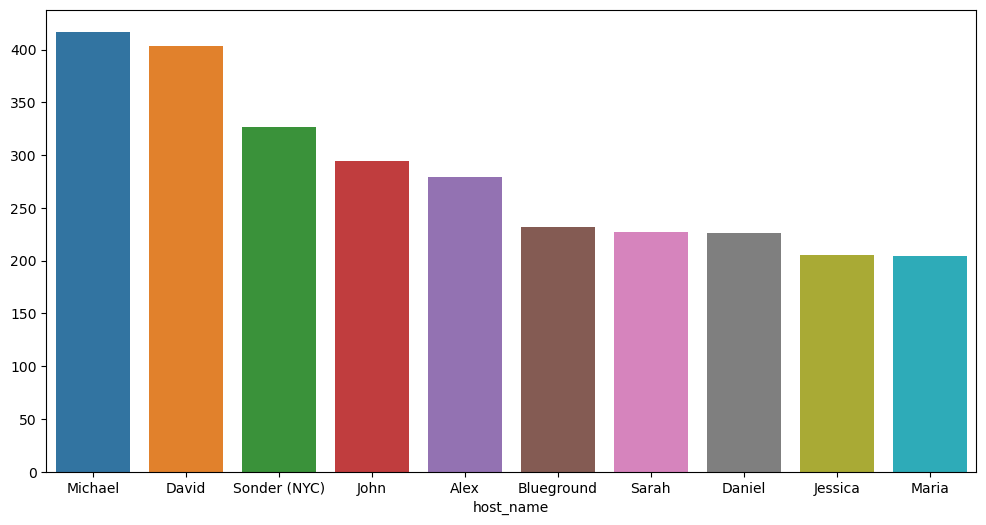

In [49]:
a = df['host_name'].value_counts()[:10]
plt.figure(figsize=(12,6))
sns.barplot(x = a.index, y=a.values)
plt.show()

Q19.Identify the neighbourhood group with the highest number of bookings and visualize the data using a pie
chart.

In [50]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21664
Brooklyn         20106
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

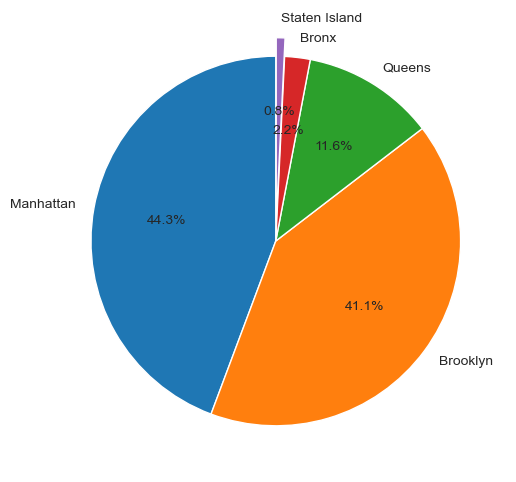

In [51]:
b = df.neighbourhood_group.value_counts()
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
explode = [0.0, 0.0, 0.0, 0.0,0.1]
plt.pie(b.values, labels=b.index, autopct='%1.1f%%', explode=explode,startangle=90)
plt.show()

Q.18) What types of rooms does the host with the highest number of bookings offer, and what is the price range
for these rooms?

In [52]:
# Finding the host with the highest number of listings
max_listings_idx = df['calculated_host_listings_count'].idxmax()
host_name, listings_count = df.loc[max_listings_idx,['host_name', 'calculated_host_listings_count']]

# Filter the dataframe for listings by this host
host_listings = df[df['host_name'] == host_name][['room_type', 'price']]

# Get the unique room types and price range for each room type
unique_room_types = host_listings['room_type'].unique()
price_ranges = host_listings.groupby('room_type')['price'].agg(['min', 'max'])

In [53]:
# Print the details about the host and their listings
print(f"The host with the highest number of listings is \033[1m{host_name}\033[0m, having \033[1m{listings_count}\033[0m listings on Airbnb.")
print(f"They offer {len(unique_room_types)} types of room(s): {unique_room_types}.")
print(f"The price range for these room types is:\n{price_ranges}")

The host with the highest number of listings is Sonder (NYC), having 327 listings on Airbnb.
They offer 2 types of room(s): ['Entire home/apt' 'Private room'].
The price range for these room types is:
                   min    max
room_type                    
Entire home/apt  100.0  699.0
Private room     200.0  616.0


Q19. Calculate the average price of all listings in the dataset.

In [54]:
f"Average Price : ${round(df.price.mean(),2)}"

'Average Price : $152.72'

Q20. Determine the minimum and maximum prices of the listings in the dataset.

In [55]:
# Finding the maximum price in the dataframe
maximum_price = df['price'].max()

# Finding the minimum price in the dataframe, excluding listings where the price is 0.0
minimum_price = df.loc[df['price'] != 0.0, 'price'].min()

# Printing the maximum and minimum prices
print(f"Maximum Price: ${maximum_price}\nMinimum Price: ${minimum_price}")

Maximum Price: $10000.0
Minimum Price: $10.0


If we include listings with 0 price then the minimum price will be 0 which means the room is free of cost. So I exclude rooms with 0 price, which ensures we don't count free rooms, which might be erroneous or promotional.

Q,23) Compare the average prices of different room types to see how they vary.

In [56]:
df.groupby(['room_type'])['price'].mean()

room_type
Entire home/apt    211.788324
Private room        89.779639
Shared room         70.127586
Name: price, dtype: float64

There is a clear variation in pricing, with entire homes/apartments being the most expensive, followed by private rooms, and shared rooms being the least expensive. The large variation between entire homes/apartments and the other room types highlights the premium placed on renting an entire property. The moderate variation between private and shared rooms indicates a smaller but still significant premium for additional privacy.

Q.24) Identify the neighbourhood group with the highest number of reviews and highlight any interesting
findings.

In [57]:
#Identify the neighbourhood group with the highest number of reviews
neighbourhood = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().idxmax()


print(f"Neighbourhood group with the highest number of reviews: \033[1m{neighbourhood}\033[0m")

Neighbourhood group with the highest number of reviews: Brooklyn


The Brooklyn neighbourhood group has the highest number of reviews,but it has the second highest number of listings. This suggests that listings in this group are more actively reviewed.